
# TP Clustering
### Diane LINGRAND 

diane.lingrand@univ-cotedazur.fr 

SI4 2022-23

In [42]:
#import the necessary libraries
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt

# Experiments on synthetic data
In this section, everything is almost already done: read carefully the codes, observe the results, play with parameters. It is very important that you understand everything in this part.

## Generating blobs

In [43]:
from sklearn.datasets import make_blobs

In [44]:
n_samples = 1500
random_state = 160
#random_state is the seed for the random generation and let you reproduce the exact same dataset
X, y = make_blobs(centers=3, n_samples=n_samples, random_state=random_state)


### Drawing the data

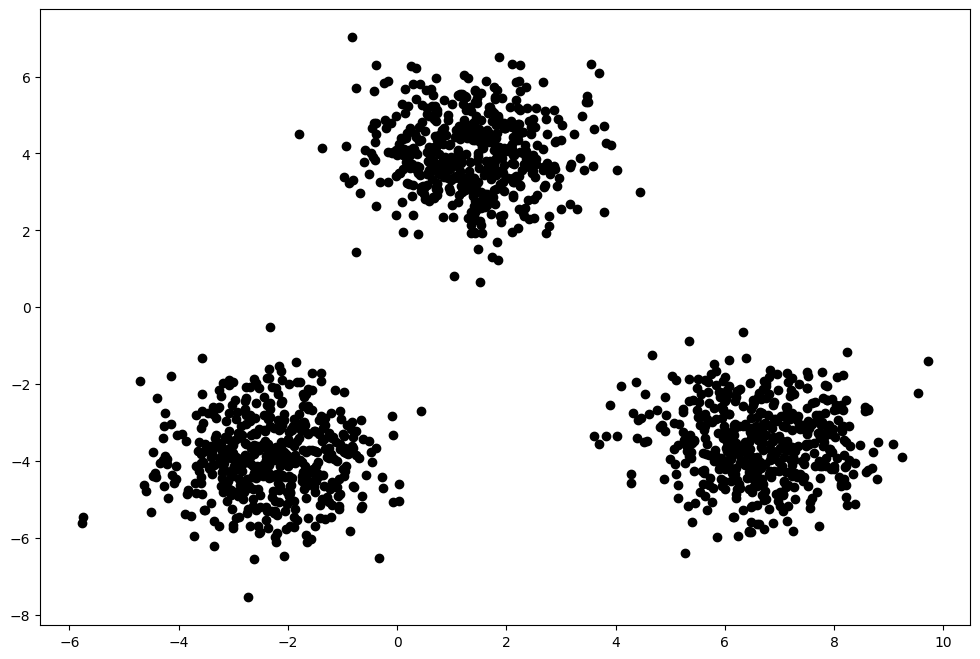

In [45]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='k')
plt.show()

## Clustering method: k-means
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html !

In [46]:
from sklearn.cluster import KMeans

In [47]:
nbClusters = 3

### Initialisation of the centroids

Read **carefully** the next 4 cells: they present different possible construction of k-means clustering objects. Before choosing the one that you will use, understand the different parameters.

In [48]:
## basic kmean with random initialisation
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='random')

In [49]:
## random initialisation but using fixed seed for reproducing the experiments
random_state2 = 150
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='random', random_state=random_state2)

In [50]:
## fixed initialisation of the centroid (no random)
c = np.array([[2,2],[1,5],[2,-4]]) #this is a bad init. try also c=np.array([[5,5],[8,2],[7,2]])
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init=c)

In [51]:
## random initialisation using heuristic 'k-means++' 
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='k-means++')
# you could also increase n_init parameter for trying different initialisation of the centroids

### Learning and prediction

In [52]:
#learning and computing the result:
y_pred = km.fit_predict(X)

### Visualisation of the clustering result.

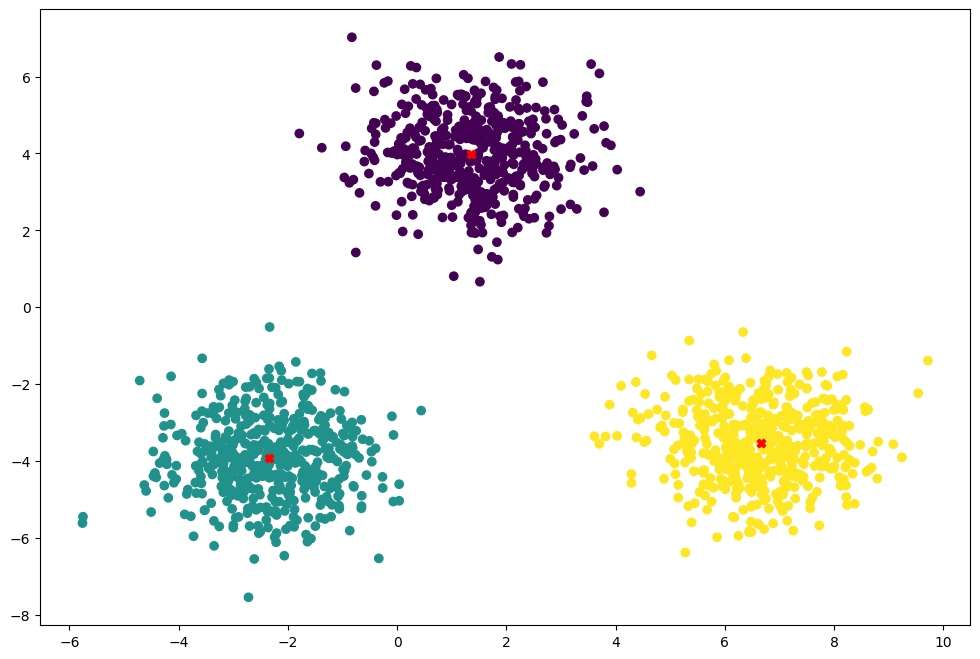

In [53]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
c=km.cluster_centers_
#we plot centroids in red
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

## Clustering method: k-medoid
Don't hesitate to read the doc: https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html !

Vous aurez besoin d'installer sklearn-extra. *You need to install sklearn-extra*:

In [54]:
!python3 -m pip install scikit-learn-extra


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [55]:
from sklearn_extra.cluster import KMedoids
km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='random')

Change the init parameters to ‘k-medoids++’ or other parameters and observe the differences.

In [56]:
km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='k-medoids++')
y_pred = km1.fit_predict(X)

Don't forget to visualize the results!

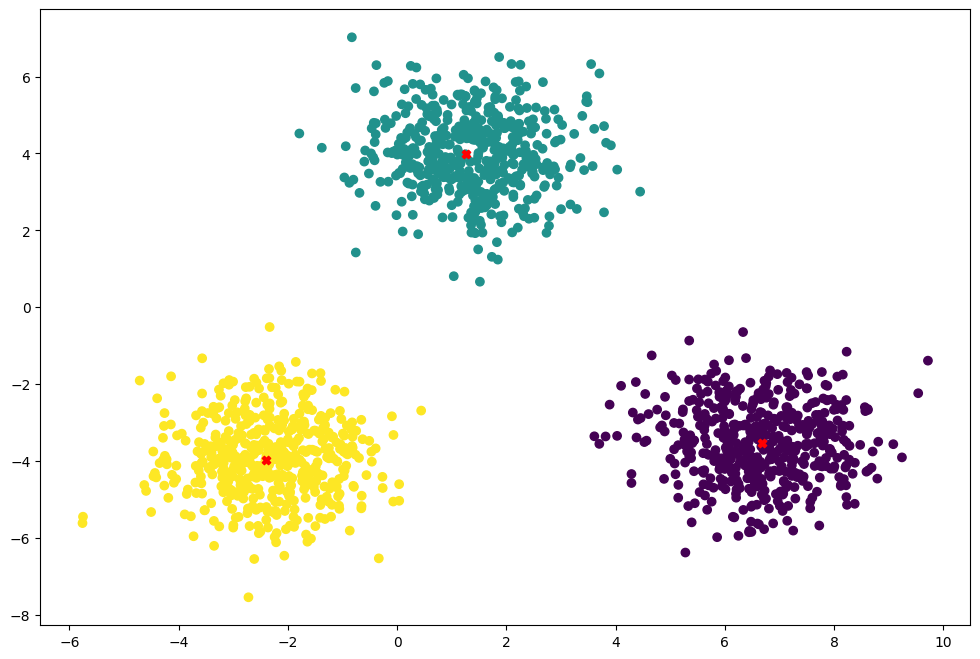

In [57]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
c=km1.cluster_centers_
#we plot centroids in red
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

## Clustering method: agglomerative clustering
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [58]:
from sklearn.cluster import AgglomerativeClustering

Testing different linkage could be a good idea!

In [59]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
#play with the linkages
y_pred = ac.fit_predict(X)

/Users/ozeliurs/Desktop/Polytech/EIIN726/labs/TD4/venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


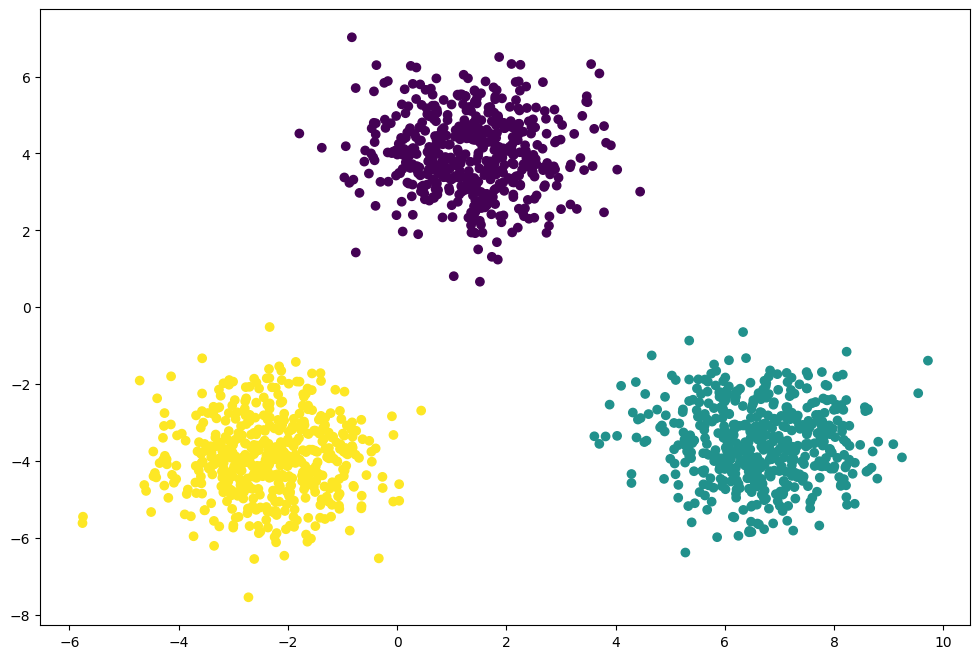

In [60]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Clustering method: DBSCAN
Don't hesitate to read the doc: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN

In [61]:
from sklearn.cluster import DBSCAN

In [62]:
db = DBSCAN(eps=0.7, min_samples=10)
y_pred=db.fit_predict(X)

#noisy points will be labelled as -1: choose a special color (black ?) for those noisy points
nbClusters = max(y_pred)+1
nbNoise = list(y_pred).count(-1)

print('Number of clusters: ', nbClusters)
print('Number of noisy samples: ', nbNoise)


Number of clusters:  3
Number of noisy samples:  22


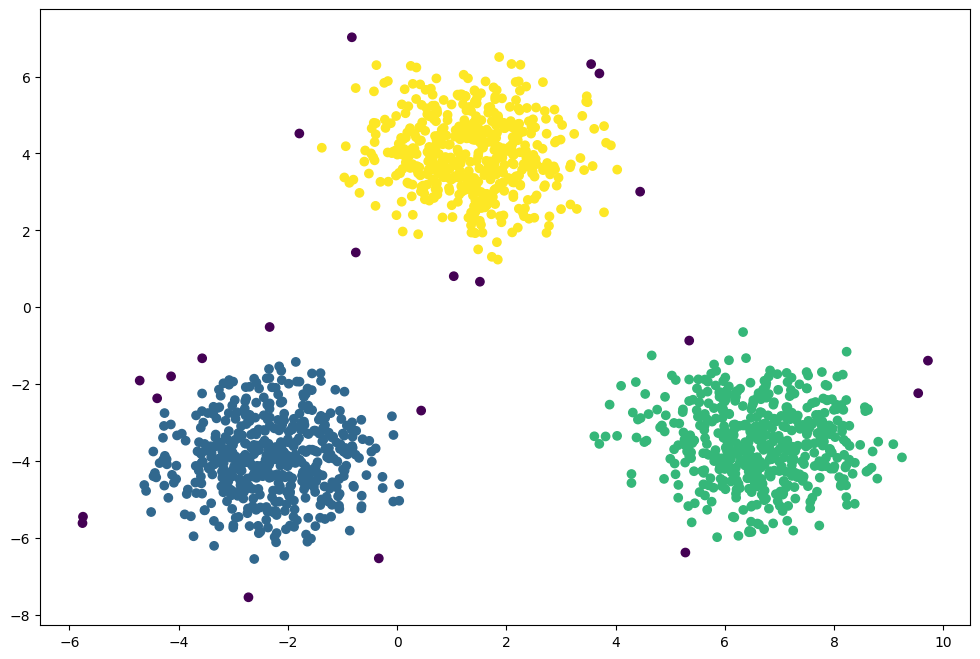

In [63]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Evaluation methods
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

In [64]:
from sklearn import metrics

In [65]:
silhouetteScore = metrics.silhouette_score(X, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Silhouette Coefficient: 0.74


**Code for plotting silhouettes.** From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

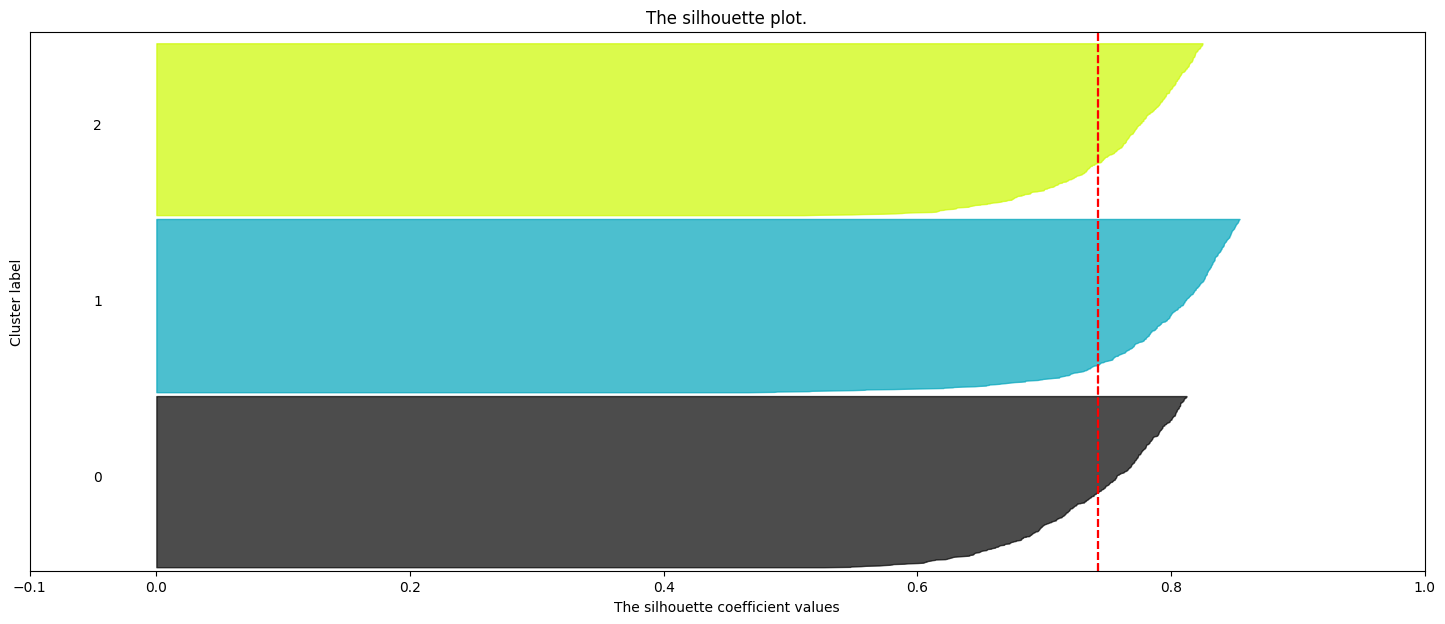

In [66]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Experiments on digit dataset
**We give you some code in this part (loading data, standardisation and visualisation) as hints but you have to test the previous clustering algorithms yourself on this digit dataset.**

In order to compare the clustering results with the original classes of the data, we will use 2 codes:
- color for the cluster number: colors = [cm.nipy_spectral(float(i) / 10) for i in range(10)]
- shape for the original class: caracters corresponding to class digit

y is the variable for the true class of each sample

ypred is the variable for the predicted cluster number of each sample (you need to use a clustering method in order to compute ypred)

X2 is the result of a dimension reduction to 2 of the data (embedded space)

**BE CAREFUL THAT THE CLUSTERING OPERATION SHOULD NOT BE DONE IN THE EMBEDDED SPACE!**

### Loading the data

In [67]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

### Data standardisation

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

### Visualisation

In [69]:
# Dimension reduction to 2 with tSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
X2 = tsne.fit_transform(Xscaled)

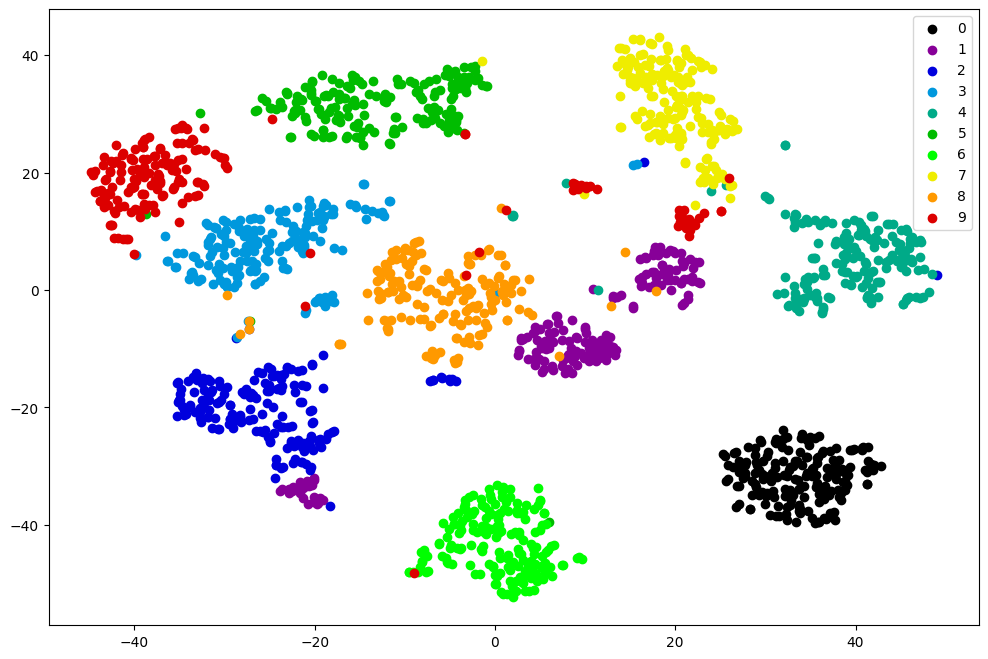

In [39]:
# Plotting the data
plt.figure(figsize=(12, 8))
colors = [cm.nipy_spectral(float(i) / 10) for i in range(10)]
for i in range(10):
    plt.scatter(X2[y == i, 0], X2[y == i, 1], color=colors[i], label=str(i))
    
plt.legend()
plt.show()

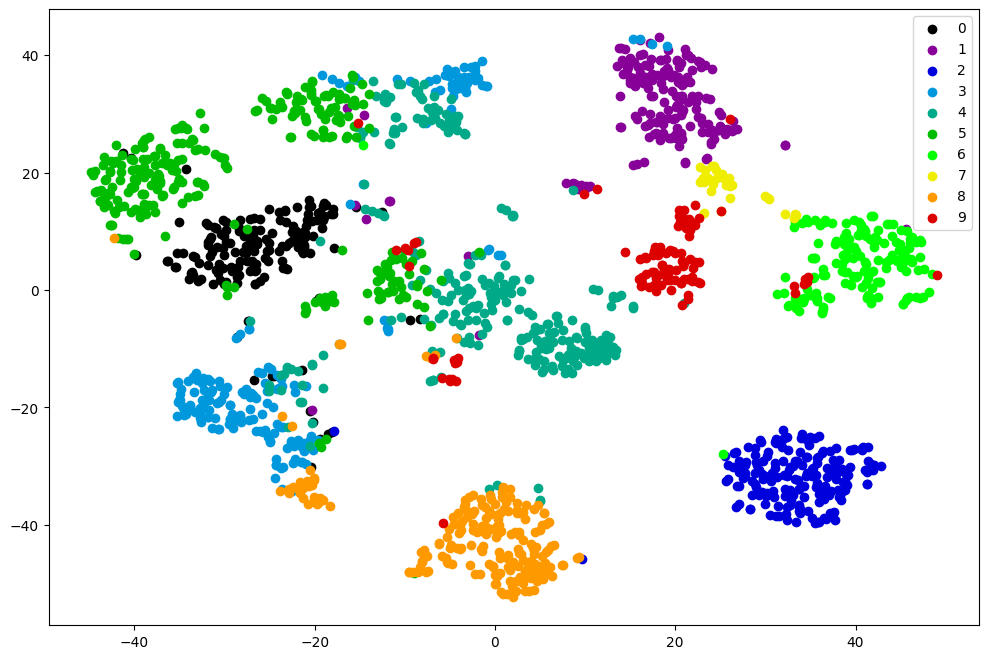

In [92]:
km = KMeans(n_clusters=10, max_iter=10, n_init=1, init='k-means++')
y_pred = km.fit_predict(Xscaled)

plt.figure(figsize=(12, 8))
colors = [cm.nipy_spectral(float(i) / 10) for i in range(10)]
for i in range(10):
    plt.scatter(X2[y_pred == i, 0], X2[y_pred == i, 1], color=colors[i], label=str(i))
    
plt.legend()
plt.show()

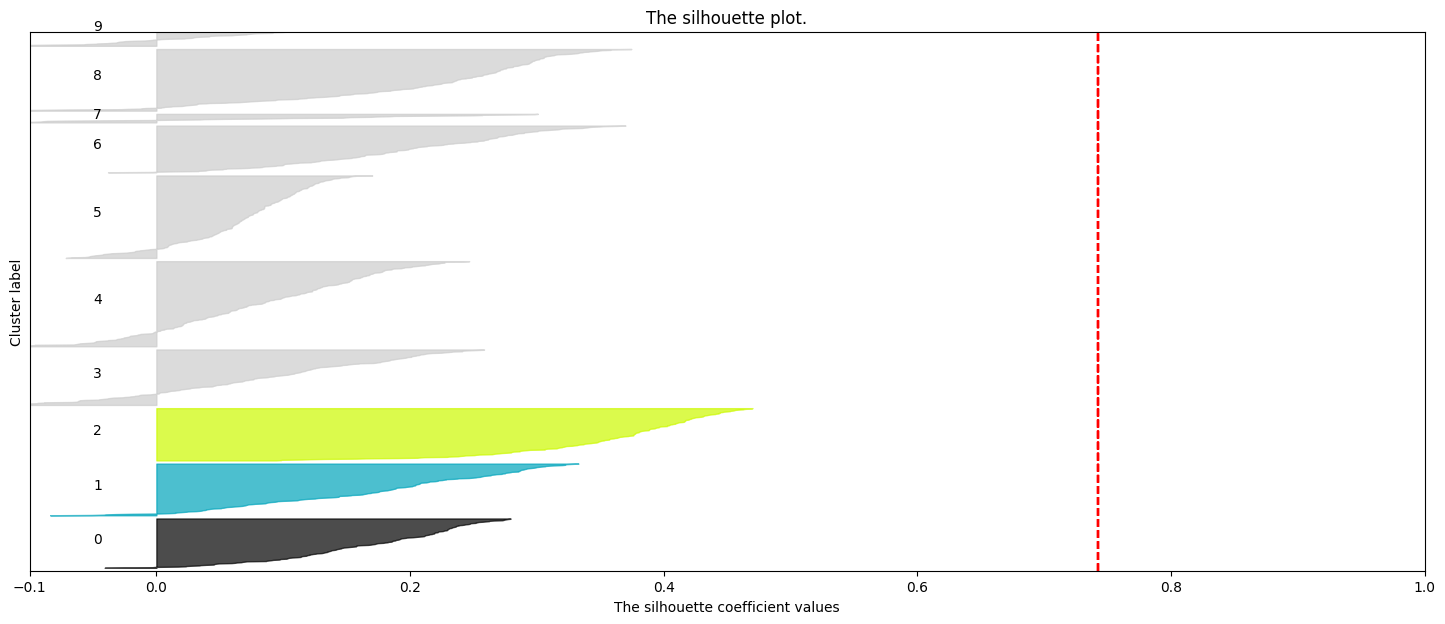

In [93]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(10):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


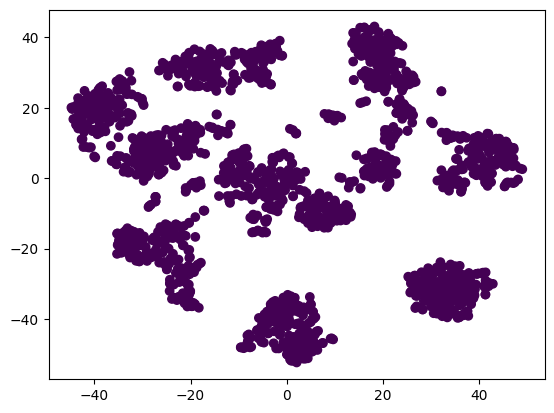

In [95]:
# pectral clustering
db = DBSCAN(eps=4.5, min_samples=10)
y_pred=db.fit_predict(Xscaled)

#plt.figure(figsize=(12, 8))
#colors = [cm.nipy_spectral(float(i) / 10) for i in range(10)]

#for i in range(10):
#    plt.scatter(X2[y_pred == i, 0], X2[y_pred == i, 1], color=colors[i], label=str(i))
 
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred)
    
# plt.legend()
plt.show()

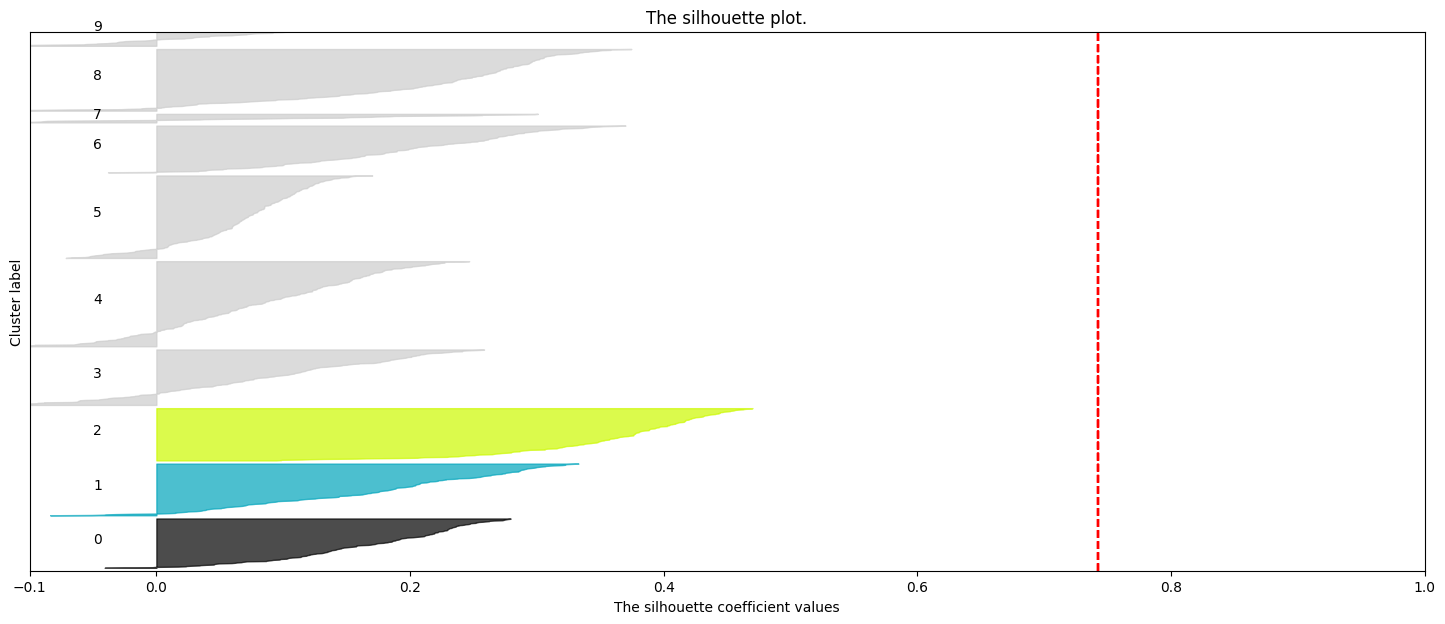

In [94]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(10):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


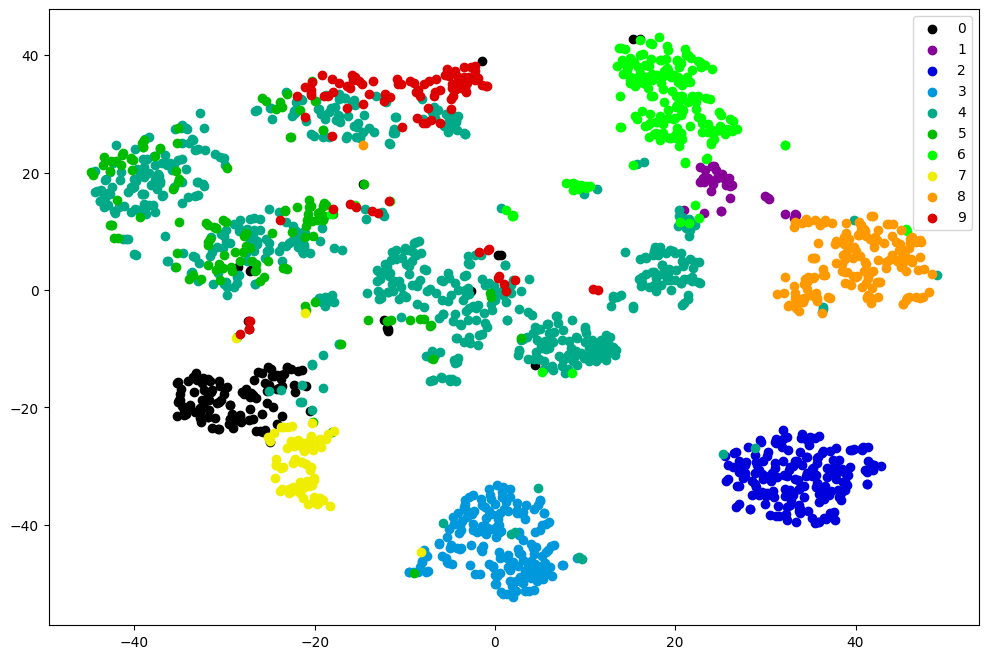

In [96]:
# Gaussian mixture
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)

y_pred = gmm.fit_predict(Xscaled)

plt.figure(figsize=(12, 8))

for i in range(10):
    plt.scatter(X2[y_pred == i, 0], X2[y_pred == i, 1], color=colors[i], label=str(i))
    
plt.legend()
plt.show()